In [1]:
import sys
# Make imports work
sys.path.insert(0, '../')

In [32]:
import importlib
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from p_tqdm import p_map

from mhealth_anomaly_detection import plots
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import datasets
from mhealth_anomaly_detection import load_refs as lr

In [3]:
importlib.reload(datasets)
year=2
dataset = datasets.GLOBEM(
    data_path='~/Data/mHealth_external_datasets/GLOBEM',
    year=year,
    sensor_data_types=['sleep', 'steps', 'location', 'call'],
)
data = dataset.data
data

/Users/akre96/Code/dgc/mhealth_anomaly_detection/notebooks/../mhealth_anomaly_detection/datasets.py:173: DtypeWarning: Columns (478,577) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(sensor_data_path, index_col=0)


Filtering only daily features. Going from 3402 to 1890 features
Filtering columns with high missingness. Going from 1894 to 1258 features
Filtering redundant features. Going from 1255 to 357 features
Filling empty study days with NaN values going from 21146 to 21146 . Added  0
Filtering high missing participants - removing 26 from dataset


,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
0,INS-W_300,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INS-W_300,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INS-W_300,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INS-W_300,ios,2019-03-24,3,0.000000,0.000000,0.000000,0.000000,0.000000,158.768383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INS-W_300,ios,2019-03-25,4,1.299894,18.718083,6.537361,94.136033,6.067866,1285.315367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21141,INS-W_572,ios,2019-06-21,92,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21142,INS-W_572,ios,2019-06-22,93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21143,INS-W_572,ios,2019-06-23,94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21144,INS-W_572,ios,2019-06-24,95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
plot_features = [
'phq4',
'f_loc:phone_locations_doryab_locationentropy:allday',
'f_loc:phone_locations_barnett_circdnrtn:allday',
'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday',
'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
'f_call:phone_calls_rapids_missed_count:allday',
'f_call:phone_calls_rapids_incoming_count:allday',
'f_call:phone_calls_rapids_outgoing_count:allday',
'f_call:phone_calls_rapids_outgoing_sumduration:allday',
]
fig_dir = Path('..', 'output', f'GLOBEM_{year}', 'lineplot')
fig_dir.mkdir(
    parents=True,
    exist_ok=True
)
palette = lr.get_colors('../lib/colors.json')

In [5]:
data.melt(
    id_vars=dataset.id_cols,
    value_vars=plot_features,
    var_name='feature',
    value_name='value'
)

,subject_id,platform,date,study_day,feature,value
0,INS-W_300,ios,2019-03-21,0,phq4,NaN
1,INS-W_300,ios,2019-03-22,1,phq4,NaN
2,INS-W_300,ios,2019-03-23,2,phq4,NaN
3,INS-W_300,ios,2019-03-24,3,phq4,NaN
4,INS-W_300,ios,2019-03-25,4,phq4,NaN
...,...,...,...,...,...,...
242107,INS-W_572,ios,2019-06-21,92,f_call:phone_calls_rapids_outgoing_sumduration...,NaN
242108,INS-W_572,ios,2019-06-22,93,f_call:phone_calls_rapids_outgoing_sumduration...,NaN
242109,INS-W_572,ios,2019-06-23,94,f_call:phone_calls_rapids_outgoing_sumduration...,NaN
242110,INS-W_572,ios,2019-06-24,95,f_call:phone_calls_rapids_outgoing_sumduration...,NaN


In [6]:

passive_feature_rep = [
'f_loc:phone_locations_doryab_locationentropy:allday',
'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
'f_call:phone_calls_rapids_outgoing_meanduration:allday',
]

<AxesSubplot: xlabel='feature', ylabel='subject_id'>

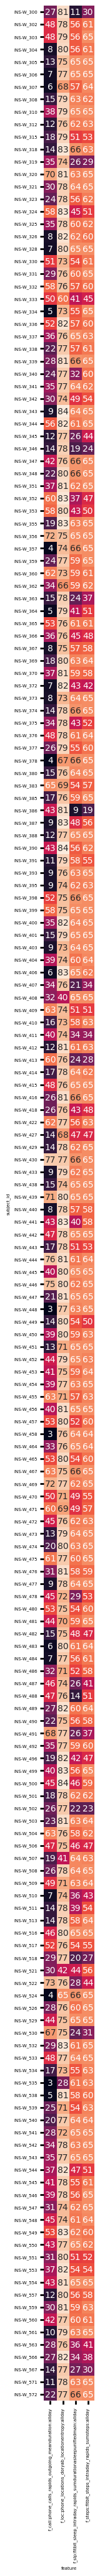

In [7]:
fig, ax = plt.subplots(figsize=(30,50))

sns.heatmap(
    data.melt(
        id_vars=dataset.id_cols,
        value_vars=passive_feature_rep,
        var_name='feature',
        value_name='value'
    ).pivot_table(
        index='subject_id',
        columns='feature',
        aggfunc='count',
        values='value',
        fill_value=0
    ),
    annot=True,
    cbar=False,
    ax=ax,
    square=True,
)
fa.despine_thicken_axes(ax, heatmap=True, fontsize=5, x_rotation=90)

/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_46117/3606728957.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).reset_index().groupby(['study_day']).sum()


<AxesSubplot: xlabel='subject_id', ylabel='study_day'>

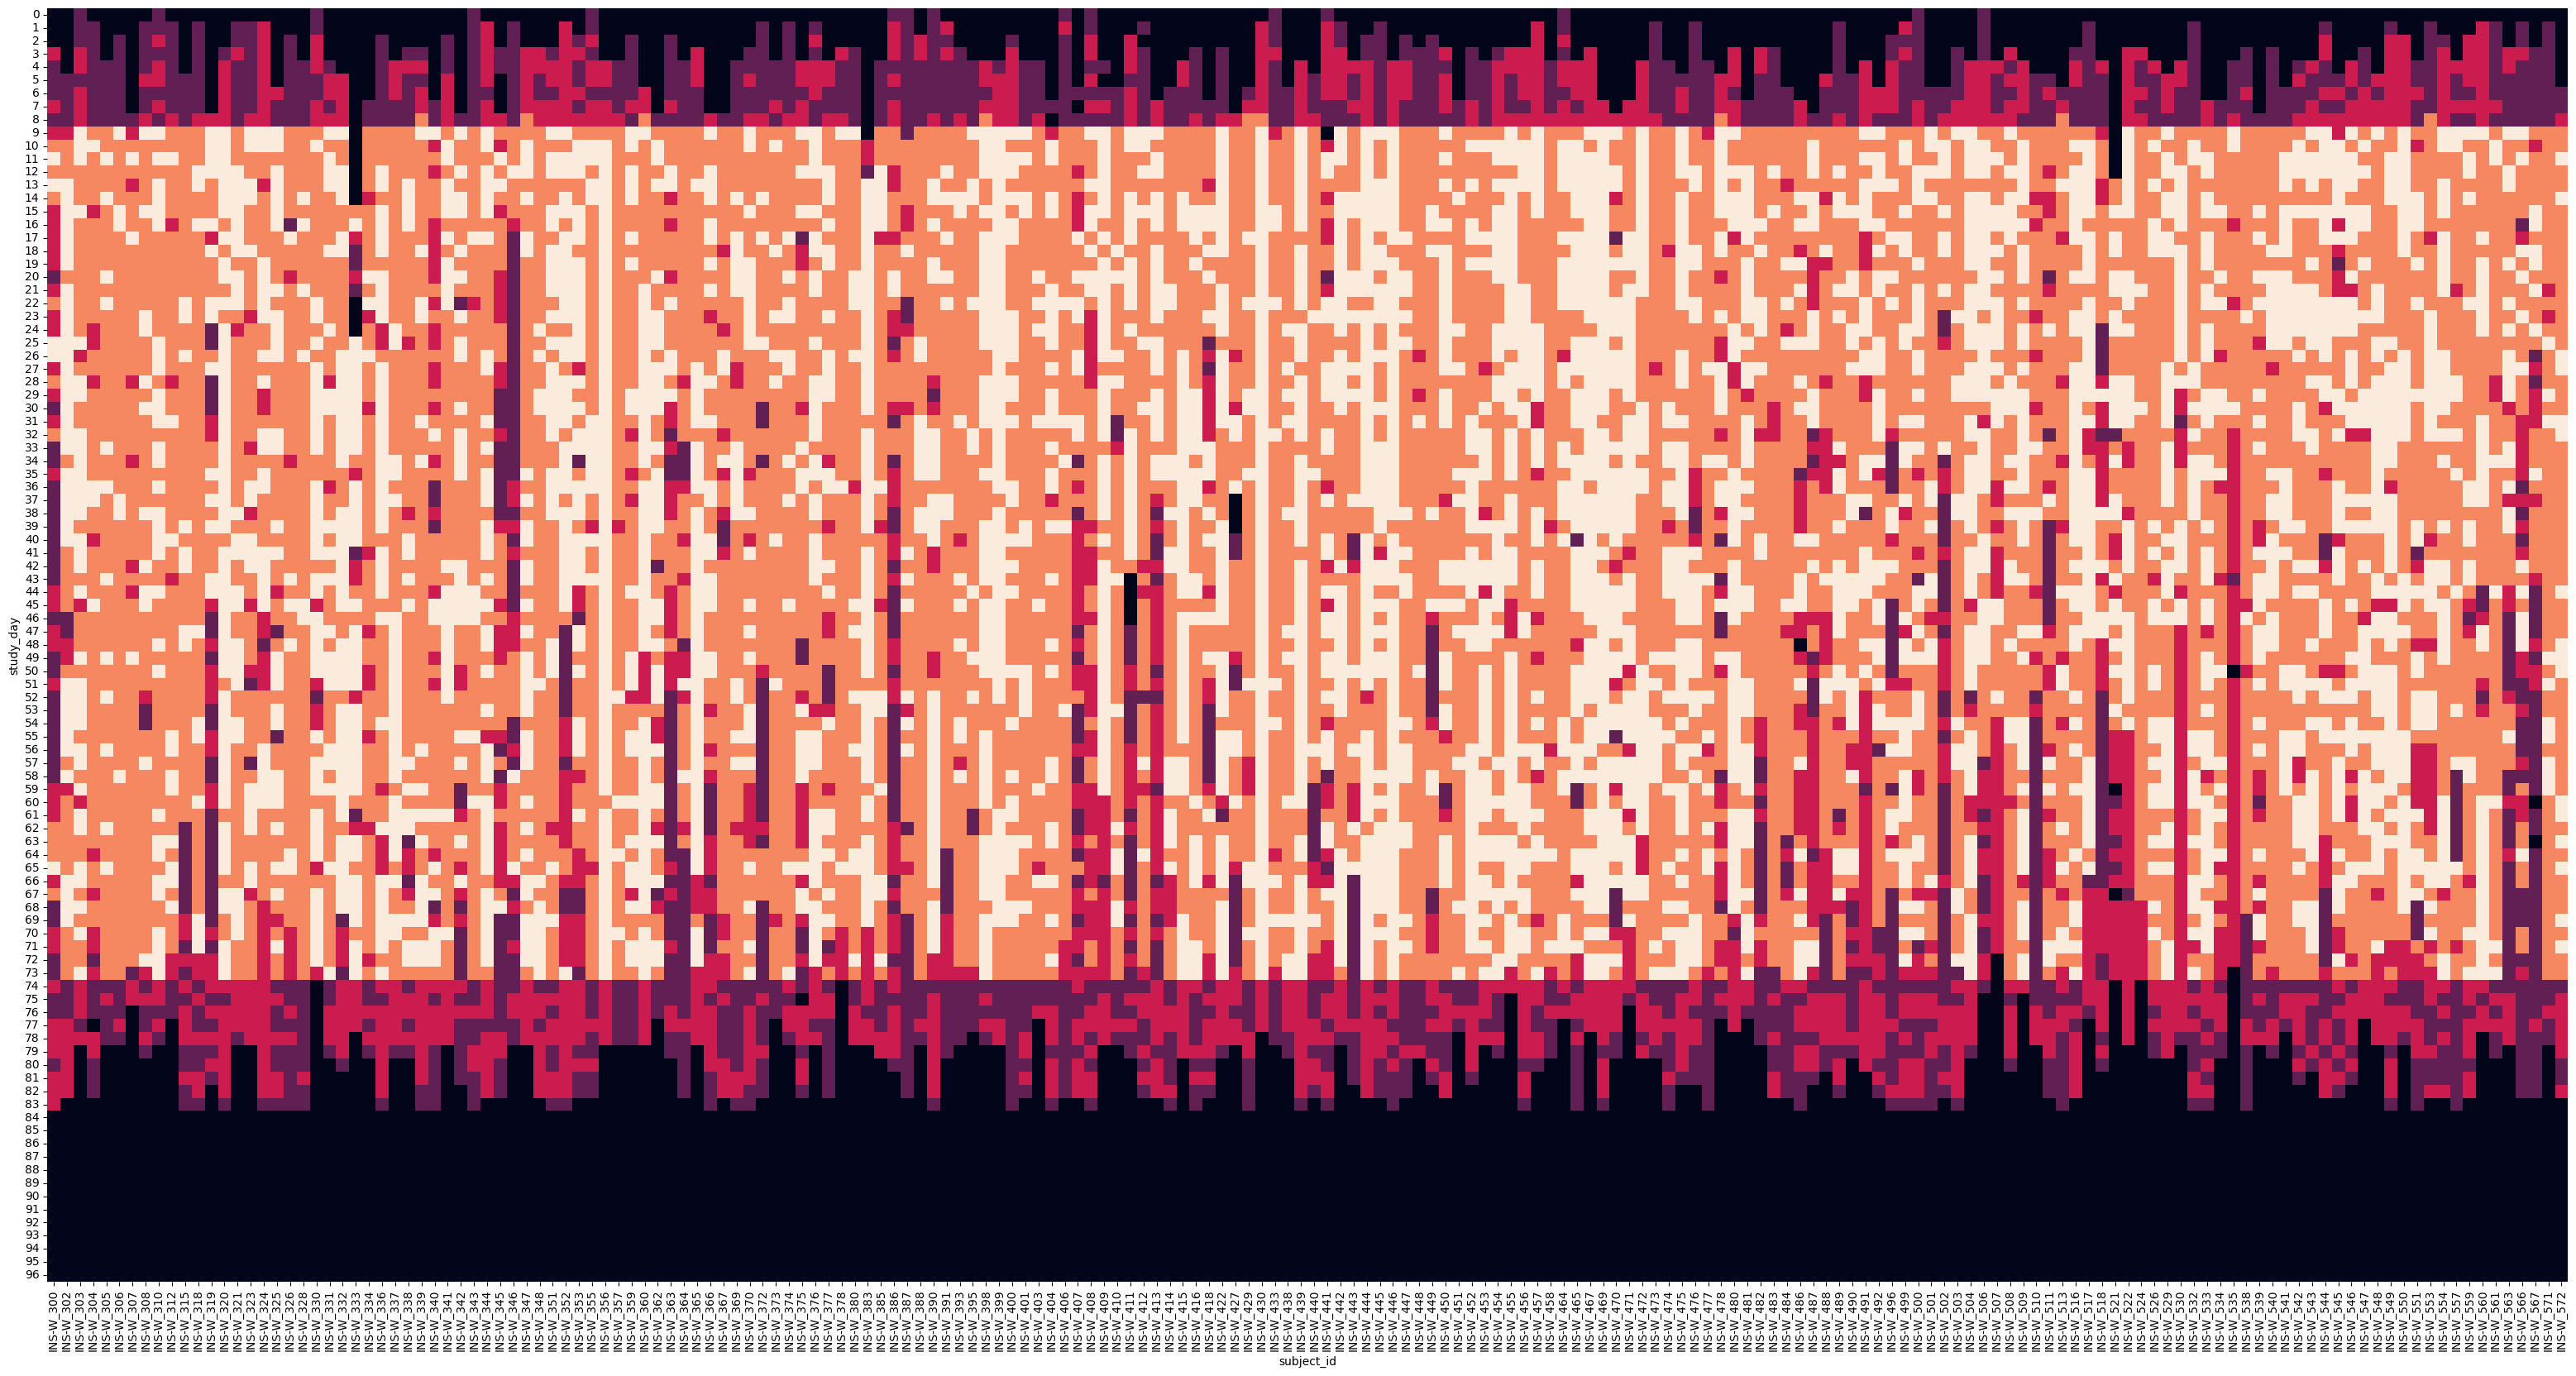

In [8]:
data_types_time = data.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['study_day', 'feature'],
    columns='subject_id',
    aggfunc='count',
    values='value',
    fill_value=0
).reset_index().groupby(['study_day']).sum()

fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(
    data_types_time,
    square=True,
    ax=ax,
    cbar=False
)

In [114]:
data_types_time.sum().sort_values().head(n=27)

subject_id
INS-W_460     24
INS-W_555     68
INS-W_536     78
INS-W_436     85
INS-W_527     86
INS-W_479     88
INS-W_361     99
INS-W_495    115
INS-W_569    120
INS-W_556    125
INS-W_346    135
INS-W_485    139
INS-W_322    142
INS-W_316    143
INS-W_502    148
INS-W_567    148
INS-W_300    149
INS-W_386    152
INS-W_518    153
INS-W_363    154
INS-W_535    155
INS-W_345    159
INS-W_510    160
INS-W_493    162
INS-W_319    164
INS-W_407    165
INS-W_335    169
dtype: int64

subject_id
INS-W_483     2
INS-W_538     2
INS-W_386     2
INS-W_524     2
INS-W_458     2
             ..
INS-W_444    58
INS-W_469    59
INS-W_446    62
INS-W_356    63
INS-W_430    65
Length: 192, dtype: int64

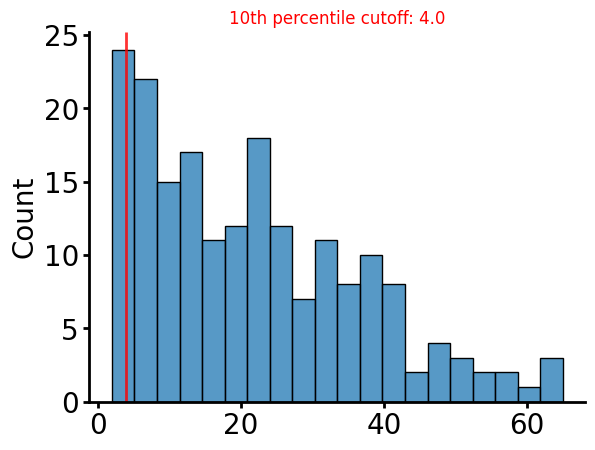

In [10]:
days_with_all_data = (data_types_time == 4).sum()
ax = sns.histplot(days_with_all_data,bins=20)
cutoff = days_with_all_data.quantile(.10)
keep_participants_passive = list(days_with_all_data[days_with_all_data >= cutoff].index)
ylim = ax.get_ylim()
ax.vlines([cutoff], *ylim, color='red', lw=2, alpha=.8)
ax.set_ylim(ylim)
ax.set_title(f'10th percentile cutoff: {cutoff}', color='red')
fa.despine_thicken_axes(ax)
days_with_all_data.sort_values()

count    218.000000
mean       9.408257
std        1.375669
min        1.000000
25%        9.000000
50%       10.000000
75%       10.000000
max       11.000000
Name: phq4, dtype: float64

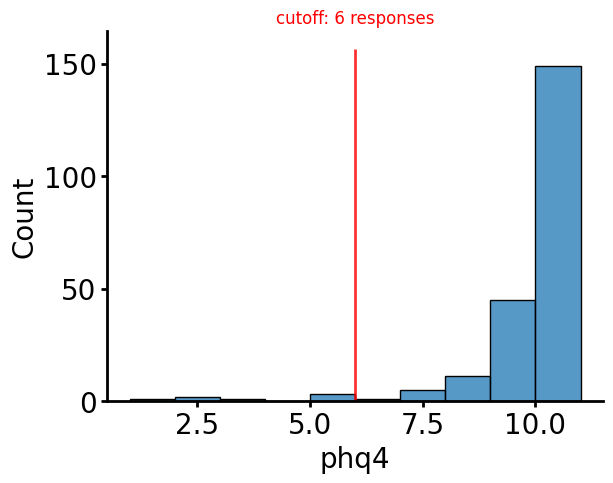

In [106]:
phq_avail = data.groupby(['subject_id']).phq4.count()
ax = sns.histplot(phq_avail, bins=10)
phq_cutoff = 6
keep_participants_active = list(phq_avail[phq_avail >= phq_cutoff].index)
ylim = ax.get_ylim()
ax.vlines([phq_cutoff], *ylim, color='red', lw=2, alpha=.8)
ax.set_title(f'cutoff: {phq_cutoff} responses', color='red')
fa.despine_thicken_axes(ax)
days_with_all_data.sort_values()
phq_avail.describe()

In [108]:
keep_participants = [s for s in keep_participants_passive if s in keep_participants_active]
len(keep_participants), data.subject_id.nunique()

(192, 218)

In [12]:
feat_time = data.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['subject_id'],
    columns=['feature','study_day'],
    aggfunc='count',
    values='value',
    fill_value=0
)
feat_time

feature    f_call:phone_calls_rapids_outgoing_meanduration:allday              \
study_day                                                      0  1  2  3  4    
subject_id                                                                      
INS-W_300                                                   0      0  0  1  0   
INS-W_302                                                   0      0  0  0  0   
INS-W_303                                                   0      0  0  1  1   
INS-W_304                                                   0      0  0  0  0   
INS-W_305                                                   0      0  0  0  0   
...                                                       ...     .. .. .. ..   
INS-W_563                                                   0      0  0  1  1   
INS-W_566                                                   0      0  0  1  0   
INS-W_567                                                   0      0  0  0  0   
INS-W_571                                                   0      0  0  0  0   
INS-W_572                                                   0      0  0  0  0   

feature                    ...  \
study_day  5  6  7  8  9   ...   
subject_id                 ...   
INS-W_300   0  0  1  0  0  ...   
INS-W_302   0  0  0  0  0  ...   
INS-W_303   0  1  1  1  1  ...   
INS-W_304   0  0  0  0  0  ...   
INS-W_305   0  0  0  0  0  ...   
...        .. .. .. .. ..  ...   
INS-W_563   0  0  0  0  1  ...   
INS-W_566   0  0  0  0  1  ...   
INS-W_567   0  0  0  0  0  ...   
INS-W_571   0  0  0  0  0  ...   
INS-W_572   0  0  0  0  0  ...   

feature    f_steps:fitbit_steps_intraday_rapids_sumsteps:allday              \
study_day                                                    87 88 89 90 91   
subject_id                                                                    
INS-W_300                                                   0    0  0  0  0   
INS-W_302                                                   0    0  0  0  0   
INS-W_303                                                   0    0  0  0  0   
INS-W_304                                                   0    0  0  0  0   
INS-W_305                                                   0    0  0  0  0   
...                                                       ...   .. .. .. ..   
INS-W_563                                                   0    0  0  0  0   
INS-W_566                                                   0    0  0  0  0   
INS-W_567                                                   0    0  0  0  0   
INS-W_571                                                   0    0  0  0  0   
INS-W_572                                                   0    0  0  0  0   

feature                    
study_day  92 93 94 95 96  
subject_id                 
INS-W_300   0  0  0  0  0  
INS-W_302   0  0  0  0  0  
INS-W_303   0  0  0  0  0  
INS-W_304   0  0  0  0  0  
INS-W_305   0  0  0  0  0  
...        .. .. .. .. ..  
INS-W_563   0  0  0  0  0  
INS-W_566   0  0  0  0  0  
INS-W_567   0  0  0  0  0  
INS-W_571   0  0  0  0  0  
INS-W_572   0  0  0  0  0  

[192 rows x 388 columns]

<AxesSubplot: xlabel='subject_id', ylabel='feature-study_day'>

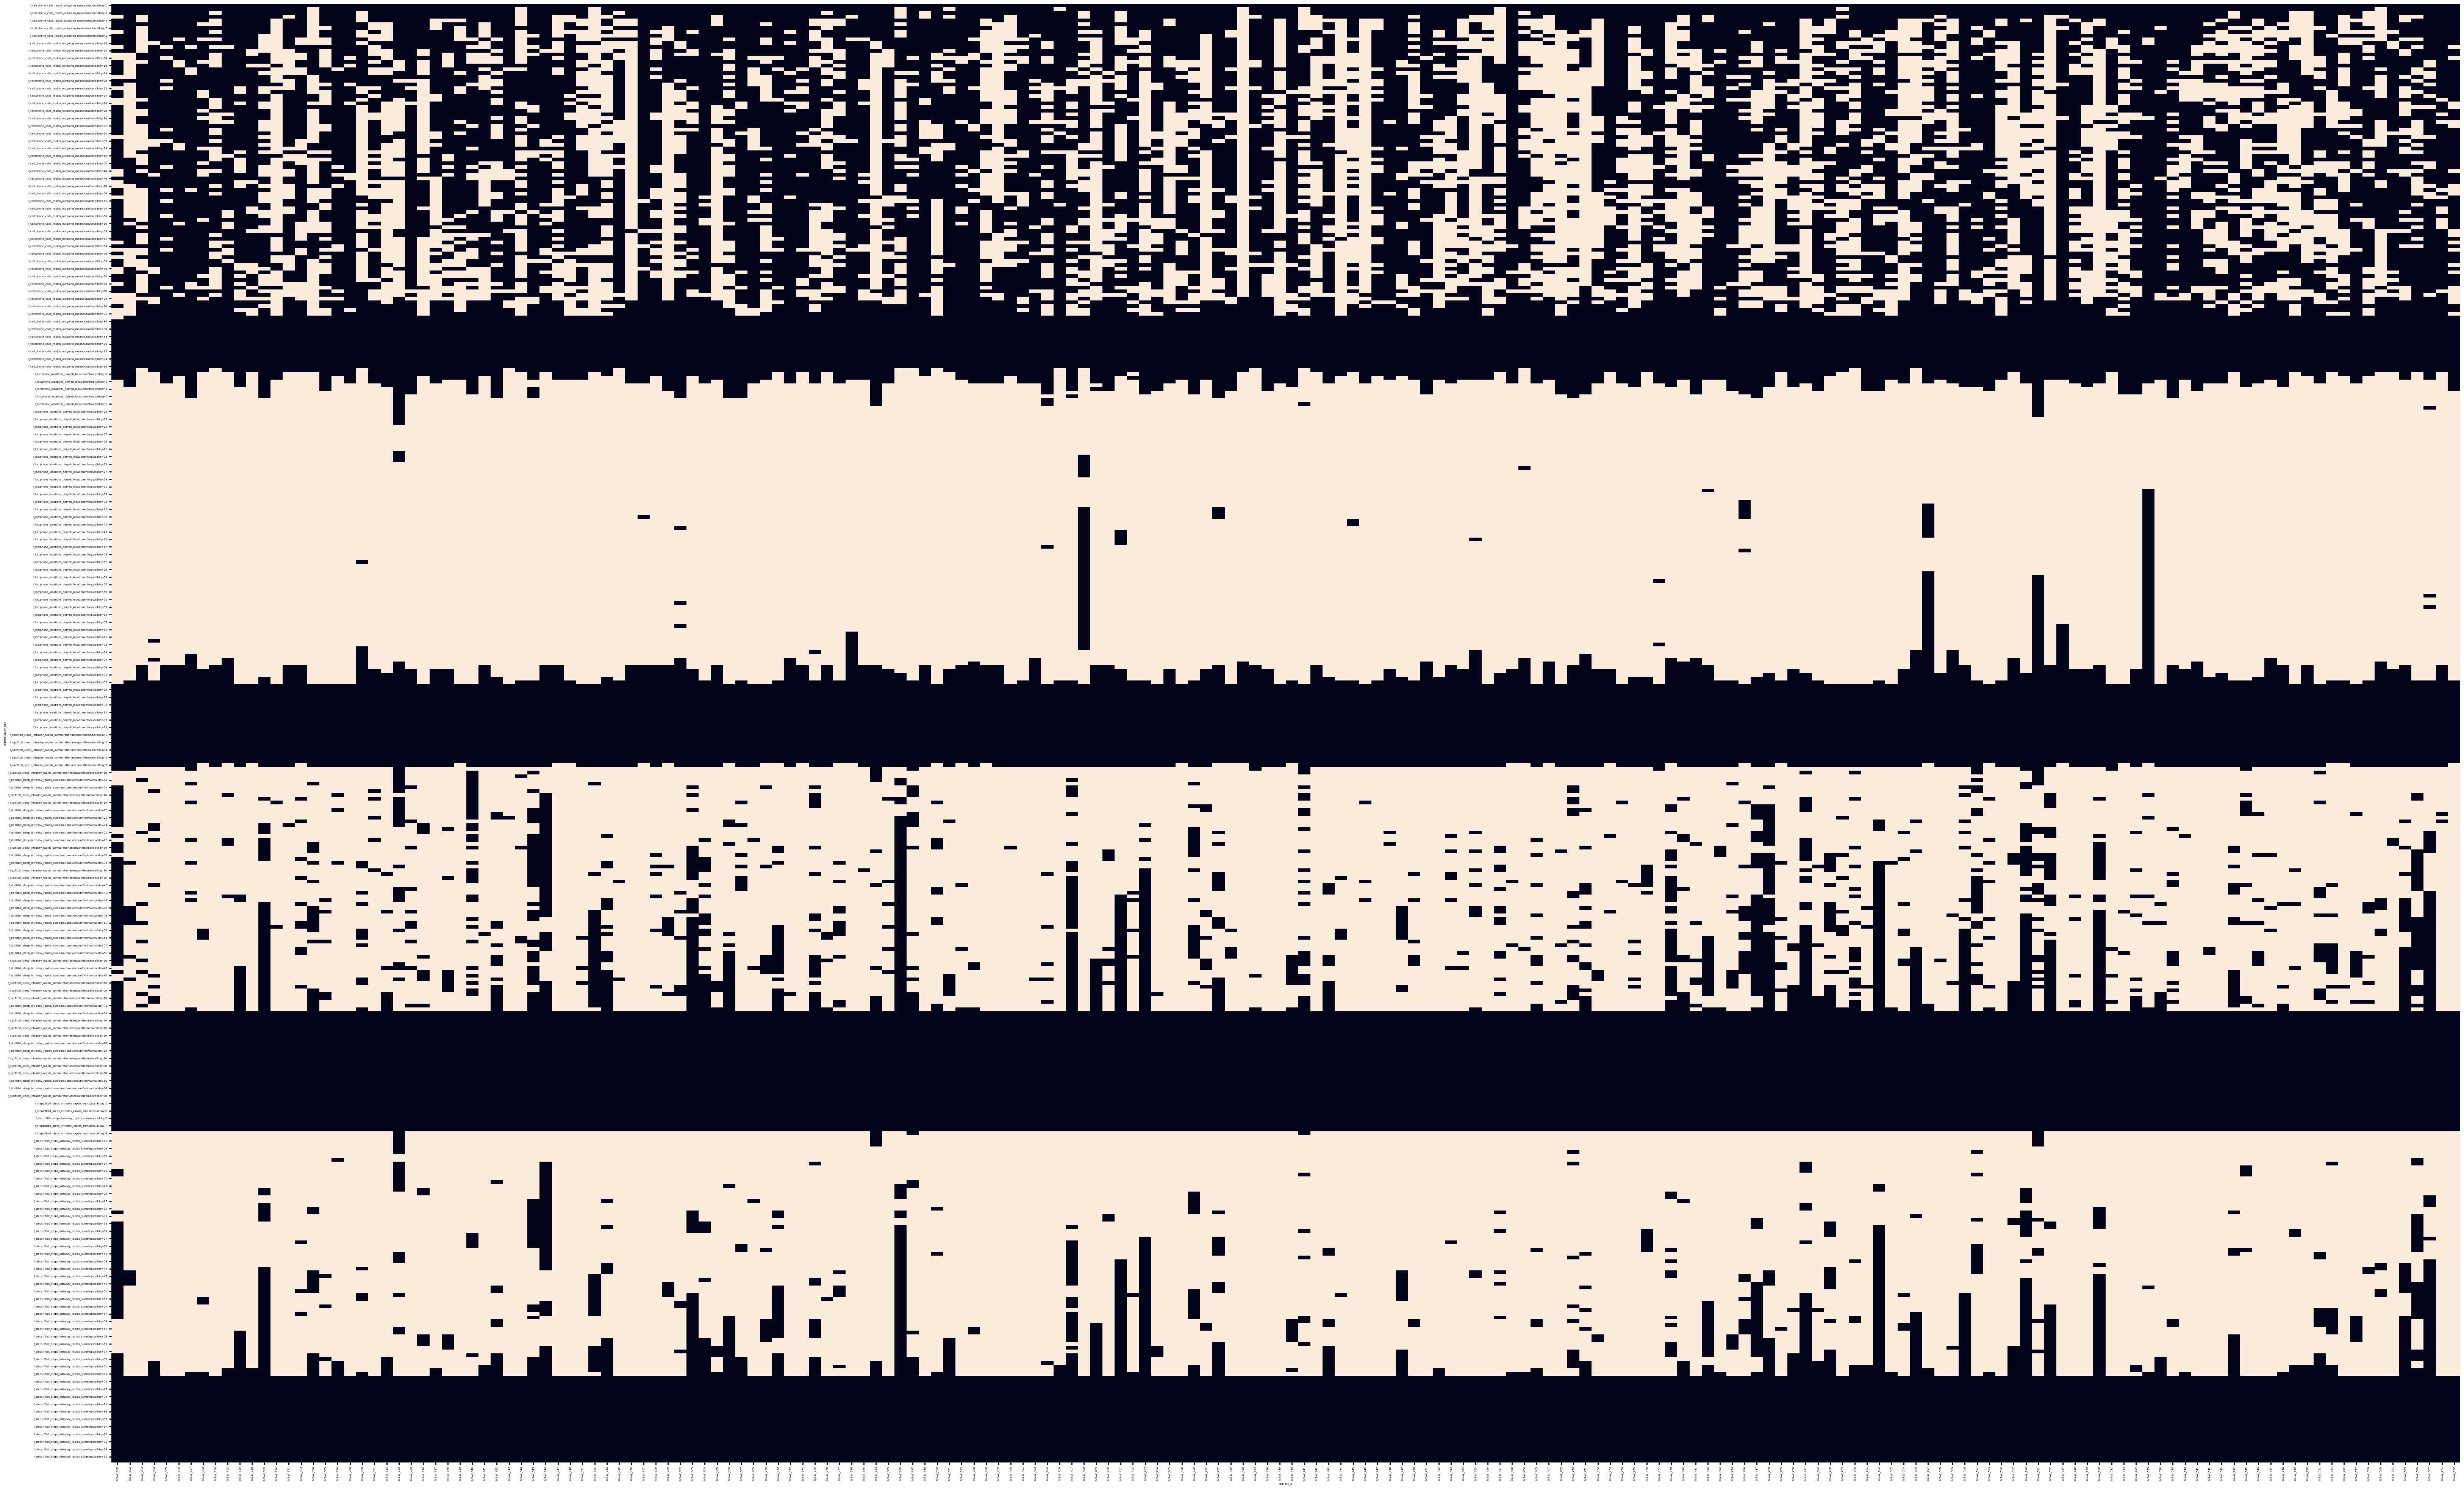

In [13]:
fig, ax = plt.subplots(figsize=(80,50))
sns.heatmap(
    feat_time.T,
    ax=ax,
    cbar=False
)

fa.despine_thicken_axes(ax, heatmap=True, fontsize=5, x_rotation=90)

In [113]:
for (sid, platform), subject_data in tqdm(data.groupby(['subject_id', 'platform'])):
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid} - {platform}')
    fname = Path(fig_dir, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()

  0%|          | 0/192 [00:00<?, ?it/s]


NameError: name 'keep_participants' is not defined

In [14]:
for f in plot_features:
    if f.startswith('phq'):
        print(
            '"' + f + '": "#004488",',
        )
    elif f.startswith('f_steps'):
        print(
            '"' + f + '": "#228833",',
        )
    elif f.startswith('f_slp'):
        print(
            '"' + f + '": "#AA3377",',
        )
    elif f.startswith('f_call'):
        print(
            '"' + f + '": "#44AA99",',
        )
    elif f.startswith('f_loc'):
        print(
            '"' + f + '": "#555555",',
        )
    else:
        print(
            '"' + f + '": "gray",',
        )

"phq4": "#004488",
"f_loc:phone_locations_doryab_locationentropy:allday": "#555555",
"f_loc:phone_locations_barnett_circdnrtn:allday": "#555555",
"f_steps:fitbit_steps_intraday_rapids_sumsteps:allday": "#228833",
"f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday": "#228833",
"f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday": "#AA3377",
"f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday": "#AA3377",
"f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday": "#AA3377",
"f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday": "#AA3377",
"f_call:phone_calls_rapids_missed_count:allday": "#44AA99",
"f_call:phone_calls_rapids_incoming_count:allday": "#44AA99",
"f_call:phone_calls_rapids_outgoing_count:allday": "#44AA99",
"f_call:phone_calls_rapids_outgoing_sumduration:allday": "#44AA99",


## Impute Dataset -- MICE

In [30]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from mhealth_anomaly_detection import impute


features = dataset.sensor_cols
min_days = 7
imputer = IterativeImputer(initial_strategy='median', keep_empty_features=True, skip_complete=True)
imputed = impute.rollingImpute(
    data,
    features,
    min_days,
    imputer,
    num_cpus=6
)
imputed

100%|██████████| 192/192 [00:23<00:00,  8.05it/s]


,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
0,INS-W_300,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INS-W_300,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INS-W_300,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INS-W_300,ios,2019-03-24,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INS-W_300,ios,2019-03-25,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21141,INS-W_572,ios,2019-06-21,92,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN
21142,INS-W_572,ios,2019-06-22,93,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN
21143,INS-W_572,ios,2019-06-23,94,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN
21144,INS-W_572,ios,2019-06-24,95,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN


/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_46117/1990320940.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).reset_index().groupby(['study_day']).sum()


<AxesSubplot: xlabel='subject_id', ylabel='study_day'>

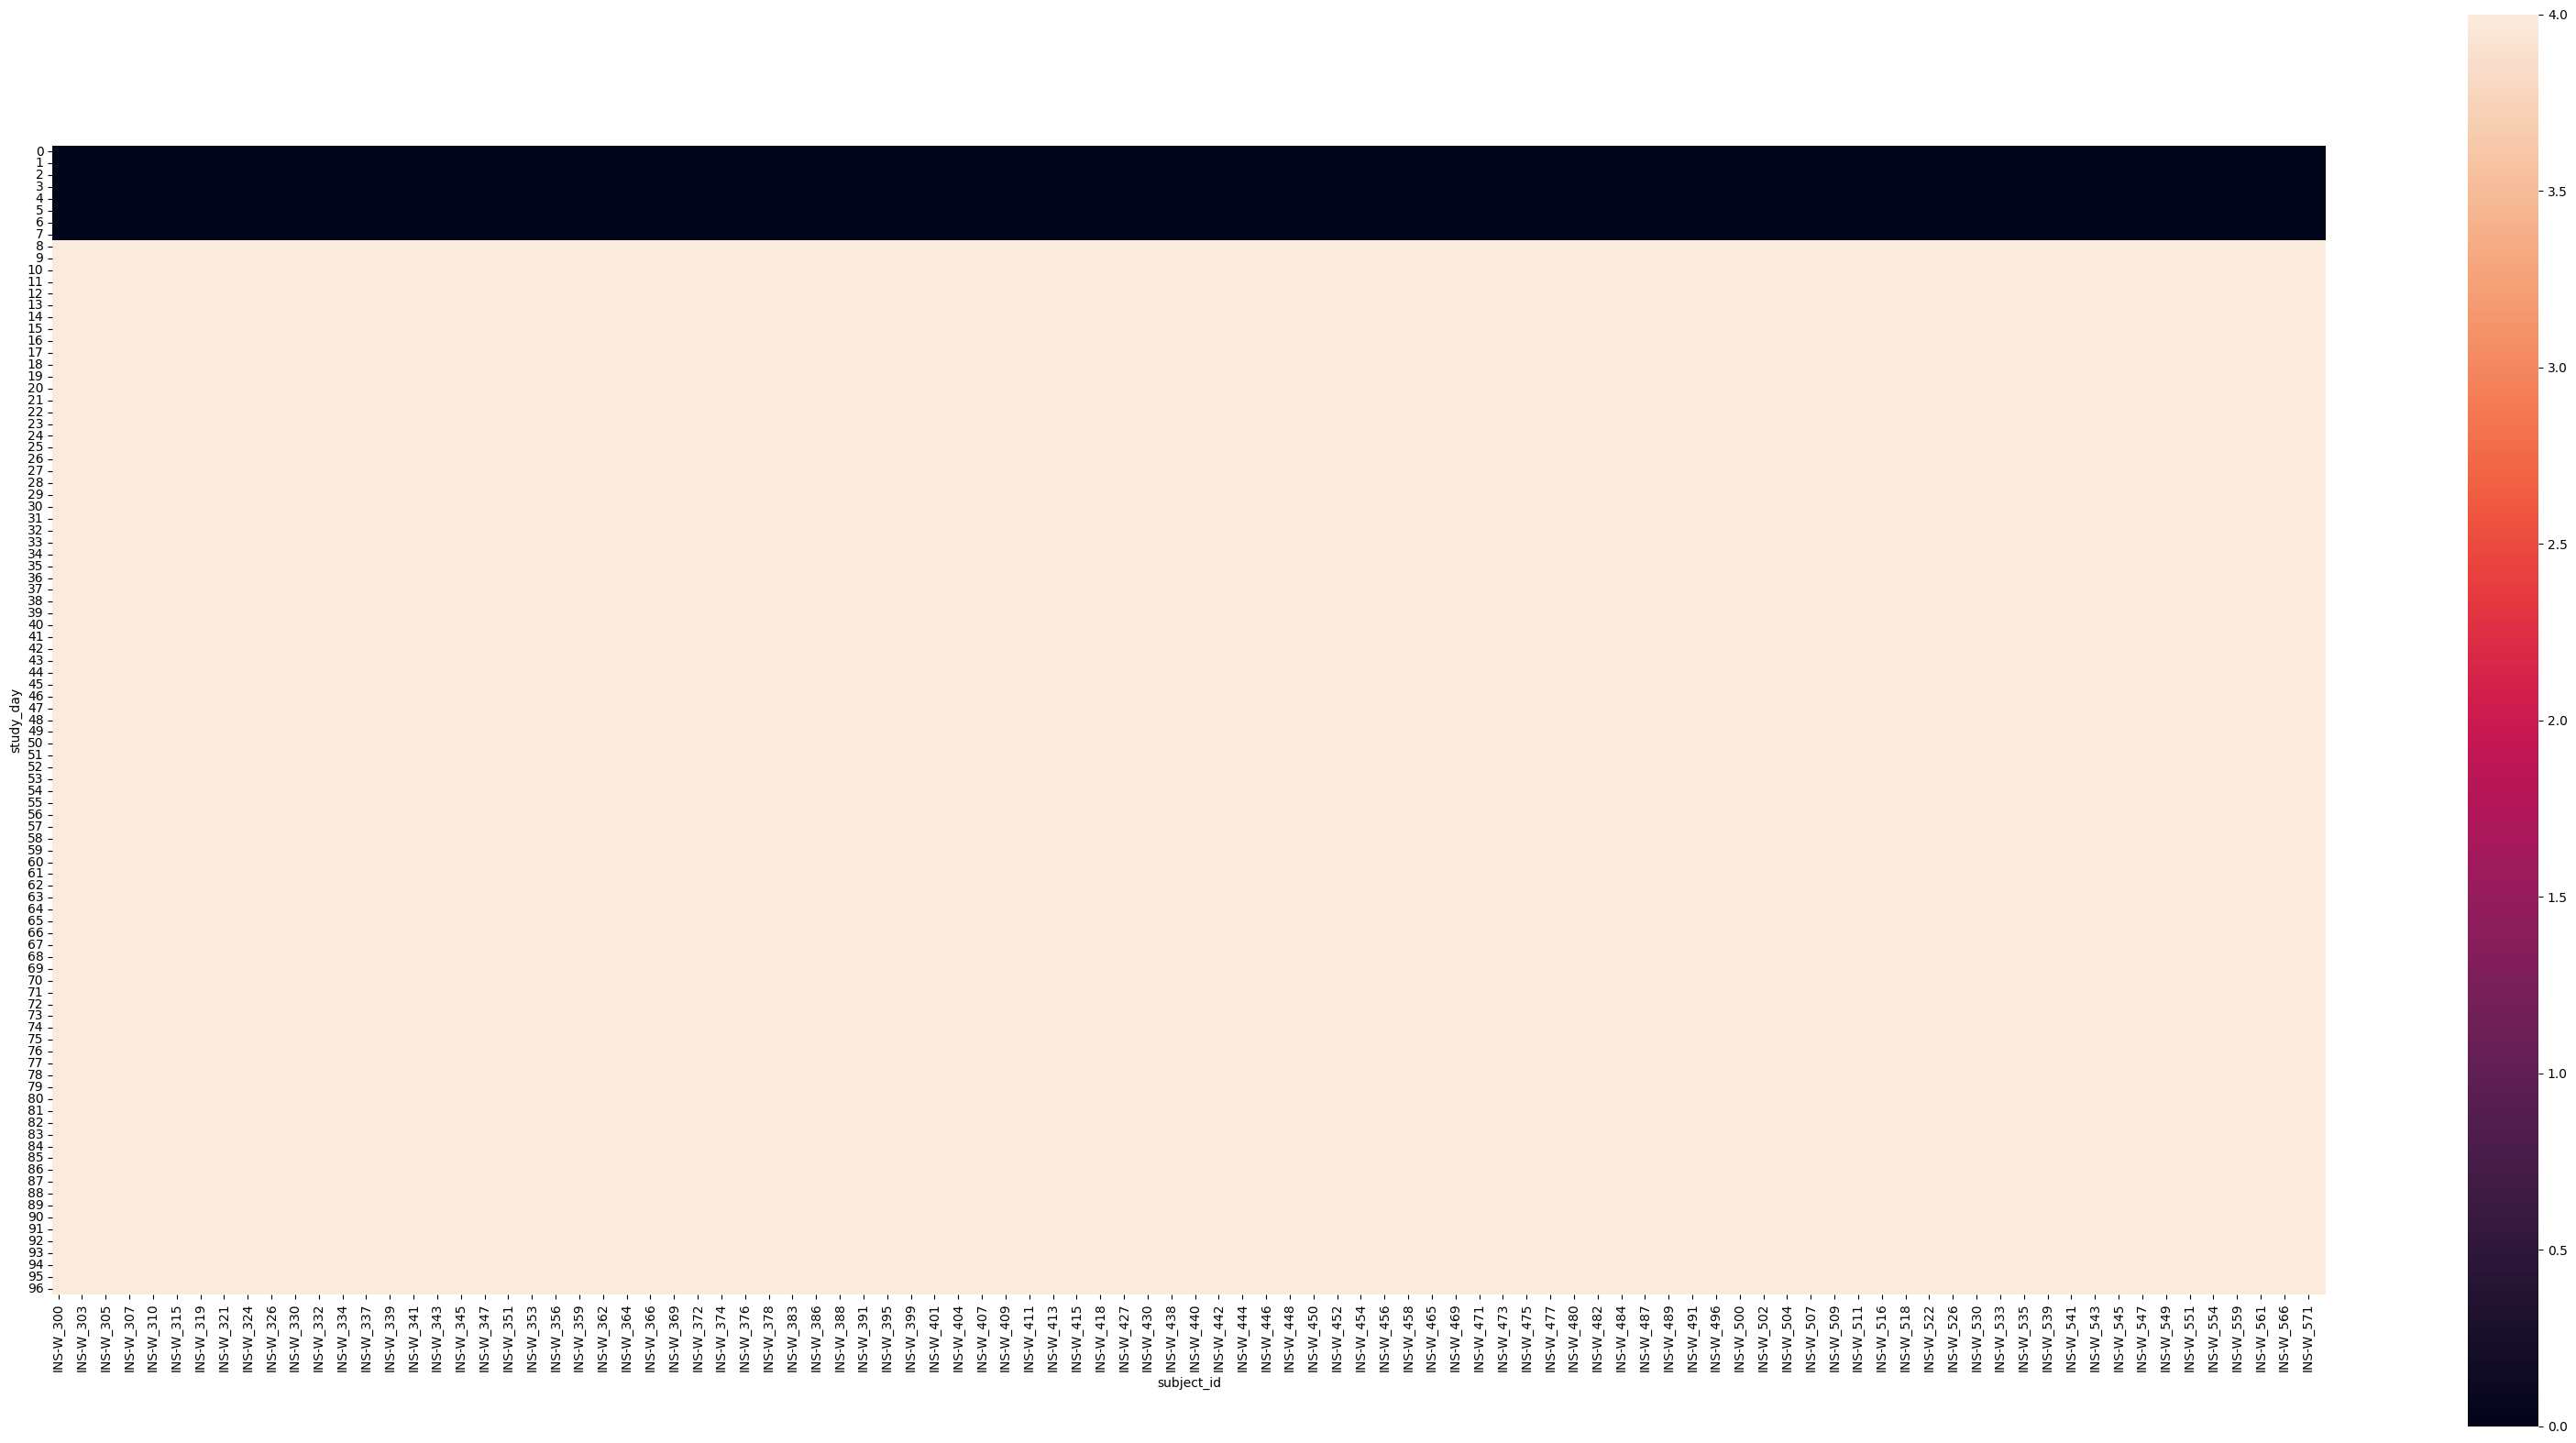

In [31]:
data_types_time = imputed.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['study_day', 'feature'],
    columns='subject_id',
    aggfunc='count',
    values='value',
    fill_value=0
).reset_index().groupby(['study_day']).sum()
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(
    data_types_time,
    square=True,
    ax=ax,
)

In [63]:
subset_plot = [
    'INS-W_347',
    'INS-W_357',
    'INS-W_360',
]

In [65]:
data[data.subject_id.isin([subset_plot[0]])]

,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
3977,INS-W_347,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3978,INS-W_347,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3979,INS-W_347,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3980,INS-W_347,ios,2019-03-24,3,1.170394,8.495867,0.102283,0.742467,0.276786,126.434143,...,NaN,NaN,NaN,NaN,NaN,832.0,1010.0,NaN,13.302882,NaN
3981,INS-W_347,ios,2019-03-25,4,9.637194,89.883350,0.024830,0.231583,34.113907,892.641617,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,547.300649,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,INS-W_347,ios,2019-06-21,92,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4070,INS-W_347,ios,2019-06-22,93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4071,INS-W_347,ios,2019-06-23,94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4072,INS-W_347,ios,2019-06-24,95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
fig_dir_imputed = Path('..', 'output', f'GLOBEM_{year}', 'mice', 'lineplot')
fig_dir_imputed.mkdir(
    parents=True,
    exist_ok=True
)

def plot_figs(input):
    info, subject_data = input
    sid, platform = info
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid} - {platform}')
    fig_dir_imputed = Path('..', 'output', f'GLOBEM_{year}', 'mice', 'lineplot')
    fname = Path(fig_dir_imputed, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()
p_map(
    plot_figs,
    imputed.groupby(['subject_id', 'platform']),
    num_cpus=6
)


100%|██████████| 3/3 [00:01<00:00,  1.98it/s]


[None, None, None]

# Playground

In [111]:
phq_anomalies = pd.read_csv('../cache/GLOBEM-2_exp04.csv')
phq_anomalies

,subject_id,start,stop,days,complete_days,phq_start,phq_stop,phq_change,RollingMean_anomaly,PCA_anomaly,NMF_anomaly,SVM_anomaly,period,n_components,window_size
0,INS-W_300,10,17,7,7,2.0,3.0,1.0,0,0,0,1,1,3,7
1,INS-W_300,17,21,7,4,3.0,3.0,0.0,0,0,0,2,1,3,7
2,INS-W_300,21,31,7,10,3.0,5.0,2.0,1,1,1,4,1,3,7
3,INS-W_300,31,38,7,7,5.0,5.0,0.0,0,1,0,2,1,3,7
4,INS-W_300,38,45,7,7,5.0,2.0,-3.0,0,1,0,6,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,INS-W_572,21,45,24,24,7.0,5.0,-2.0,NaN,0,0,NaN,3,20,28
39524,INS-W_572,31,49,24,18,6.0,6.0,0.0,NaN,0,0,NaN,3,20,28
39525,INS-W_572,38,59,24,21,4.0,2.0,-2.0,NaN,0,0,NaN,3,20,28
39526,INS-W_572,45,66,24,21,5.0,7.0,2.0,NaN,1,0,NaN,3,20,28


In [112]:
import scipy.stats as stats
info_cols = [
    'period',
    'window_size',
    'n_components',
]
corr_dict = {
    'detector': [],
    'rho': [],
    'p': [],
    'n': [],
    **{
        inf: [] for inf in info_cols
    }
}
for info, i_df in phq_anomalies.groupby(info_cols):
    for d in anomaly_detector_cols:
        n = i_df[[d, 'phq_change']].dropna().shape[0]
        rho, p = stats.spearmanr(
            i_df[d],
            i_df['phq_change']
        )
        if not np.isnan(p):
            corr_dict['detector'].append(d)
            for i in range(len(info_cols)):
                corr_dict[info_cols[i]].append(info[i])
            corr_dict['n'].append(n)
            corr_dict['rho'].append(rho)
            corr_dict['p'].append(p)
corr = pd.DataFrame(corr_dict) 
corr

/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-Qbd7iEZF-py3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-Qbd7iEZF-py3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-Qbd7iEZF-py3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-

,detector,rho,p,n,period,window_size,n_components
0,RollingMean_anomaly,-0.017561,0.475129,1656,1,7,3
1,PCA_anomaly,-0.027388,0.265321,1656,1,7,3
2,NMF_anomaly,-0.022641,0.357179,1656,1,7,3
3,SVM_anomaly,-0.007378,0.764169,1656,1,7,3
4,PCA_anomaly,-0.017375,0.479832,1656,1,7,5
...,...,...,...,...,...,...,...
67,NMF_anomaly,0.029557,0.292182,1272,3,28,5
68,PCA_anomaly,-0.001300,0.963059,1272,3,28,10
69,NMF_anomaly,0.020666,0.461481,1272,3,28,10
70,PCA_anomaly,-0.023199,0.408418,1272,3,28,20


<AxesSubplot: xlabel='n_components-period', ylabel='detector-window_size'>

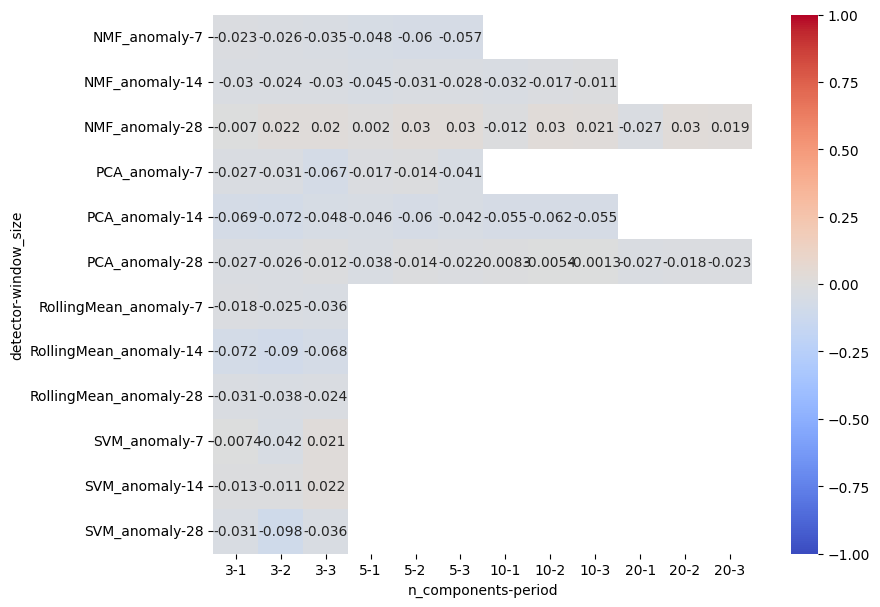

In [113]:
corr_table = corr.pivot_table(
    index=['detector', 'window_size'],
    columns=['n_components', 'period'],
    values='rho',
    aggfunc='median'
)
hm_size = (10, 7)
fig, ax = plt.subplots(figsize=hm_size)
sns.heatmap(
    corr_table,
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    annot=True,
    cmap='coolwarm',
    ax=ax
)

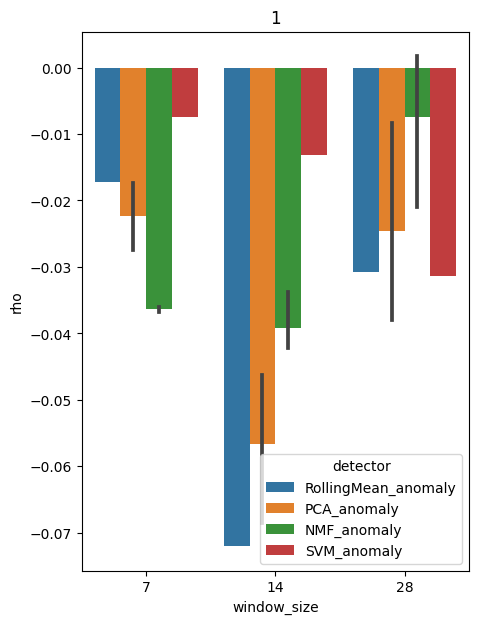

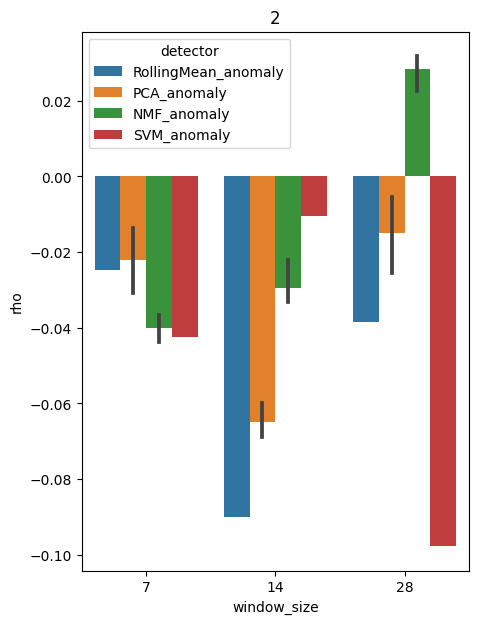

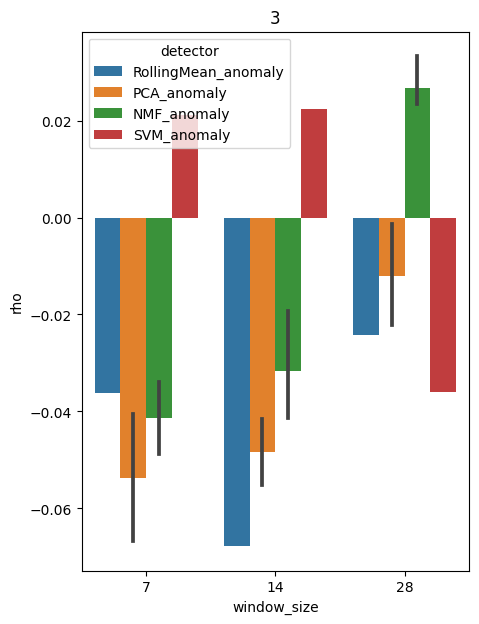

In [110]:
for p, p_df in corr.groupby('period'):
    fig, ax = plt.subplots(figsize=(5,7))
    sns.barplot(
        x='window_size',
        y='rho',
        data=p_df,
        hue='detector',
        ax=ax
    )
    ax.set_title(p)

In [80]:
qc = phq_anomalies[phq_anomalies.days == phq_anomalies.period*7]
qc.shape, phq_anomalies.shape

((24960, 15), (35136, 15))

In [18]:
phq_anomalies.loc[
    phq_anomalies.n_components != 3,
    'SVM_anomaly'
] = np.nan

In [71]:
anomaly_detector_cols = [
    d for d in phq_anomalies.columns if d.endswith("_anomaly")
]
corr = phq_anomalies.groupby(
    ['subject_id', 'window_size', 'n_components', 'period']
)[['phq_change', *anomaly_detector_cols]].corr(method='spearman')
c1 = corr["phq_change"].reset_index()
detector_corr = c1[c1.level_4 != 'phq_change'].rename(columns={'level_4': 'detector', 'phq_change': 'corr'})
detector_corr.head(n=20)


/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_46117/1508198112.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr = phq_anomalies.groupby(


,subject_id,window_size,n_components,period,detector,corr
1,INS-W_300,7,3,1,RollingMean_anomaly,0.214286
2,INS-W_300,7,3,1,PCA_anomaly,-0.268926
3,INS-W_300,7,3,1,NMF_anomaly,0.214286
5,INS-W_300,7,3,2,RollingMean_anomaly,0.622752
6,INS-W_300,7,3,2,PCA_anomaly,-0.080064
7,INS-W_300,7,3,2,NMF_anomaly,0.622752
9,INS-W_300,7,3,3,RollingMean_anomaly,0.427793
10,INS-W_300,7,3,3,PCA_anomaly,-0.646762
11,INS-W_300,7,3,3,NMF_anomaly,0.427793
13,INS-W_300,7,5,1,RollingMean_anomaly,0.214286


In [72]:
detector_corr[
    (detector_corr.detector == 'PCA_anomaly') &
    (detector_corr.period == 1)
].head(n=20)

,subject_id,window_size,n_components,period,detector,corr
2,INS-W_300,7,3,1,PCA_anomaly,-0.268926
14,INS-W_300,7,5,1,PCA_anomaly,-0.268926
26,INS-W_300,14,3,1,PCA_anomaly,-0.472456
38,INS-W_300,14,5,1,PCA_anomaly,-0.472456
50,INS-W_300,14,10,1,PCA_anomaly,-0.472456
62,INS-W_300,28,3,1,PCA_anomaly,-0.425210
74,INS-W_300,28,5,1,PCA_anomaly,-0.425210
86,INS-W_300,28,10,1,PCA_anomaly,-0.425210
98,INS-W_302,7,3,1,PCA_anomaly,-0.359722
110,INS-W_302,7,5,1,PCA_anomaly,-0.359722


In [26]:
detector_corr.subject_id.unique()

array(['INS-W_300', 'INS-W_338', 'INS-W_372', 'INS-W_373', 'INS-W_410',
       'INS-W_453', 'INS-W_489', 'INS-W_490', 'INS-W_533', 'INS-W_572'],
      dtype=object)

<AxesSubplot: xlabel='phq_change', ylabel='Count'>

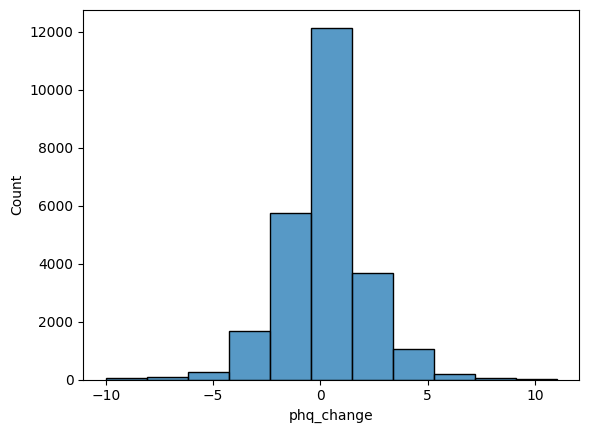

In [99]:
sns.histplot(qc['phq_change'], bins=11)

In [92]:
parameter_cols = ['n_components', 'window_size', 'period']
anomaly_detector_cols = [
    d for d in phq_anomalies.columns if d.endswith("_anomaly")
]
phq_anom_melt = qc.melt(
    id_vars=['subject_id', 'start', 'phq_change'] + parameter_cols,
    value_vars=anomaly_detector_cols,
    value_name='anomalies',
    var_name='detector'
).dropna()

In [93]:
phq_anom_melt

,subject_id,start,phq_change,n_components,window_size,period,detector,anomalies
0,INS-W_300,10,1.0,3,7,1,RollingMean_anomaly,0
1,INS-W_300,17,0.0,3,7,1,RollingMean_anomaly,0
2,INS-W_300,21,2.0,3,7,1,RollingMean_anomaly,1
3,INS-W_300,31,0.0,3,7,1,RollingMean_anomaly,0
4,INS-W_300,38,-3.0,3,7,1,RollingMean_anomaly,0
...,...,...,...,...,...,...,...,...
92515,INS-W_572,31,-1.0,3,28,2,SVM_anomaly,4
92516,INS-W_572,38,2.0,3,28,2,SVM_anomaly,5
92517,INS-W_572,45,-3.0,3,28,2,SVM_anomaly,2
92518,INS-W_572,49,1.0,3,28,2,SVM_anomaly,1


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

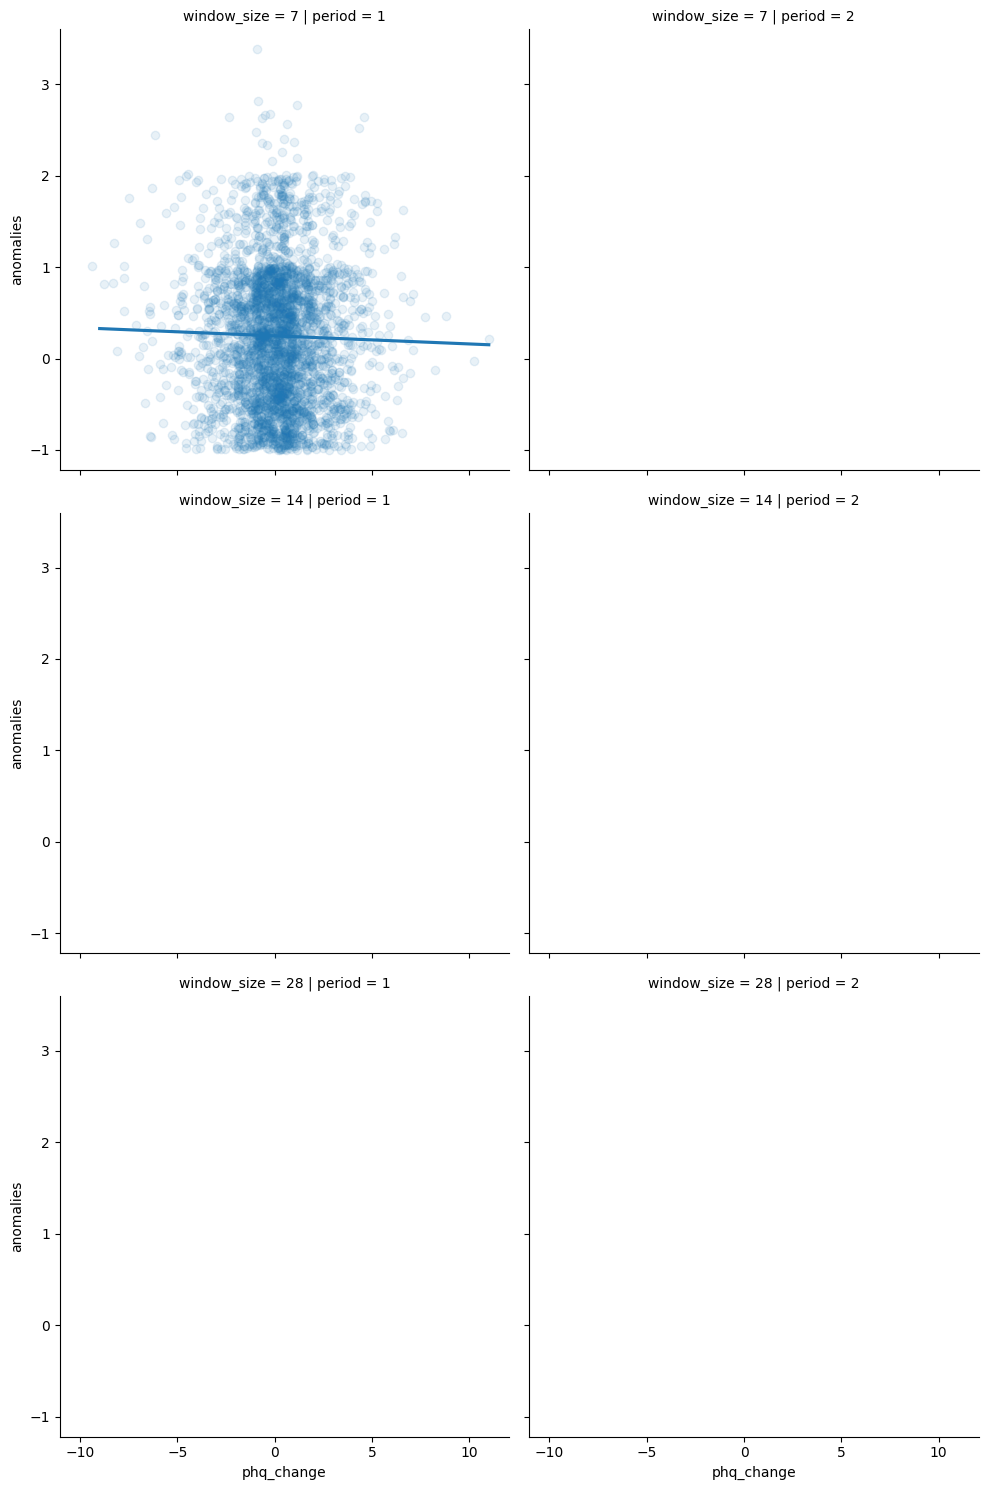

In [95]:
for detector, d_df in phq_anom_melt.groupby('detector'):
    facetgrid = sns.lmplot(
        data=d_df,
        x='phq_change',
        y='anomalies',
        col='period',
        row='window_size',
        x_jitter=True,
        y_jitter=True,
        scatter_kws={
            "alpha": 0.1
        }
    )

In [96]:
d_df

,subject_id,start,phq_change,n_components,window_size,period,detector,anomalies
49920,INS-W_300,10,1.0,3,7,1,NMF_anomaly,0
49921,INS-W_300,17,0.0,3,7,1,NMF_anomaly,0
49922,INS-W_300,21,2.0,3,7,1,NMF_anomaly,1
49923,INS-W_300,31,0.0,3,7,1,NMF_anomaly,0
49924,INS-W_300,38,-3.0,3,7,1,NMF_anomaly,0
...,...,...,...,...,...,...,...,...
74875,INS-W_572,31,-1.0,10,28,2,NMF_anomaly,0
74876,INS-W_572,38,2.0,10,28,2,NMF_anomaly,0
74877,INS-W_572,45,-3.0,10,28,2,NMF_anomaly,0
74878,INS-W_572,49,1.0,10,28,2,NMF_anomaly,0
